# Preprocessor Seruat Recipe Test on Zebrafish Data 

Import the package and silence some warning information (mostly `is_categorical_dtype` warning from anndata)

In [1]:
import dynamo as dyn
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from dynamo.configuration import DKM
import warnings
import scvelo as scv
warnings.filterwarnings('ignore')


this is like R's sessionInfo() which helps you to debug version related bugs if any. 

## Load data

In [2]:
adata = dyn.sample_data.zebrafish()
scv_adata = dyn.sample_data.zebrafish()

|-----> Downloading data to ./data/zebrafish.h5ad
|-----> Downloading data to ./data/zebrafish.h5ad


## Apply Seurat Flavor Gene Selection

In [3]:
# adata = dyn.sample_data.zebrafish()
from dynamo.preprocessing import Preprocessor
import pearson_residual_normalization_recipe
monocle_filter_genes_by_outliers_kwargs = Preprocessor.get_monocle_filter_genes_outliers_kwargs(
    adata)
preprocessor = Preprocessor()
preprocessor.config_seurat_recipe()
preprocessor.select_genes(adata, **preprocessor.select_genes_kwargs)
# preprocessor.preprocess_adata(adata)


|-----> filtering genes by dispersion...
|-----> select genes by recipe: seurat
|-----------> choose 2000 top genes
|-----> <insert> pp_gene_means to var in AnnData Object.
|-----> <insert> gene_vars to var in AnnData Object.
|-----> <insert> gene_highly_variable to var in AnnData Object.
|-----> number of selected highly variable genes: 2000
|-----> [filter genes by dispersion] in progress: 100.0000%
|-----> [filter genes by dispersion] finished [1.6476s]


In [4]:
scv.pp.filter_genes_dispersion(scv_adata, flavor="seurat", n_top_genes=2000)

Extracted 2000 highly variable genes.


## Compare preprocess results with those of scvelo seurat impl

0
set()


<AxesSubplot:>

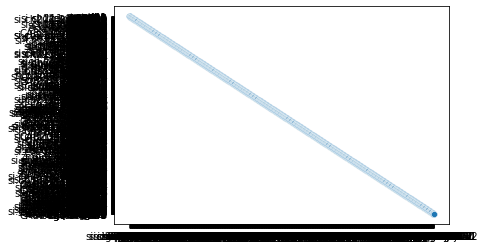

In [8]:
preprocess_genes = adata.var_names[adata.var[DKM.VAR_GENE_HIGHLY_VARIABLE_KEY]]
scv_genes = scv_adata.var_names

print(len(set(scv_genes).difference(set(preprocess_genes))))
print(set(scv_genes).difference(set(preprocess_genes)))

assert not set(scv_genes).difference(set(preprocess_genes))
assert not set(preprocess_genes).difference(set(scv_genes))

sns.scatterplot(scv_genes, preprocess_genes)

Conclusion: our implementation and scvelo's has the same set of genes.

## Zebrafish Visualization Routine 

In [9]:
preprocessor.preprocess_adata(adata)

|-----> Running preprocessing pipeline...
|-----------> <insert> {} to uns['pp'] in AnnData Object.
|-----------> <insert> tkey=None to uns['pp'] in AnnData Object.
|-----------> <insert> experiment_type=None to uns['pp'] in AnnData Object.
|-----> making adata observation index unique...
|-----> applying collapse species adata...
|-----> applying convert_gene_name function...
|-----> filtering outlier cells...
|-----------> filtering cells by layer:X
|-----------> filtering cells by layer:spliced
|-----------> filtering cells by layer:unspliced
|-----> skip filtering by layer:protein as it is not in adata.
|-----> <insert> pass_basic_filter to obs in AnnData Object.
|-----------> inplace subsetting adata by filtered genes
|-----> filtering outlier genes...
|-----> extra kwargs:{}
|-----> selecting genes...
|-----> filtering genes by dispersion...
|-----> select genes by recipe: seurat
|-----------> choose 2000 top genes
|-----> <insert> pp_gene_means to var in AnnData Object.
|-----> 

In [10]:
dyn.tl.reduceDimension(adata,basis="pca")
# dyn.tl.reduceDimension(scv_adata,basis="pca")

|-----> retrive data for non-linear dimension reduction...
|-----> perform umap...
|-----> [dimension_reduction projection] in progress: 100.0000%
|-----> [dimension_reduction projection] finished [40.6000s]


In [15]:
dyn.tl.dynamics(adata)

|-----> dynamics_del_2nd_moments_key is None. Using default value from DynamoAdataConfig: dynamics_del_2nd_moments_key=False
|-----> calculating first/second moments...
|-----> [moments calculation] in progress: 100.0000%
|-----> [moments calculation] finished [13.8249s]
estimating gamma: 100%|██████████| 2000/2000 [01:01<00:00, 32.73it/s]


AnnData object with n_obs × n_vars = 4167 × 16940
    obs: 'split_id', 'sample', 'Size_Factor', 'condition', 'Cluster', 'Cell_type', 'umap_1', 'umap_2', 'batch', 'pass_basic_filter', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'initial_cell_size'
    var: 'pp_gene_means', 'gene_vars', 'gene_highly_variable', 'use_for_pca', 'pass_basic_filter', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'bs', 'bf', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics'
    uns: 'pp', 'PCs', 'explained_variance_ratio_', 'pca_mean', 'pca_valid_ind', 'neighbors', 'umap_fit', 'dynamics'
    obsm: 'X', 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced', 'X_spliced', 'X_unspliced', 'M_u', 'M_uu', 'M_s', 'M_us', 'M_ss', 'velocity_S'
    obsp: 'distances', 'connectivities', 'moments_con'

|-----> retrive data for non-linear dimension reduction...
|-----? adata already have basis umap. dimension reduction umap will be skipped! 
set enforce=True to re-performing dimension reduction.
|-----> Start computing neighbor graph...
|-----------> X_data is None, fetching or recomputing...
|-----> fetching X data from layer:None, basis:pca
|-----> method arg is None, choosing methods automatically...
|-----------> method ball_tree selected
|-----> <insert> connectivities to obsp in AnnData Object.
|-----> <insert> distances to obsp in AnnData Object.
|-----> <insert> neighbors to uns in AnnData Object.
|-----> <insert> neighbors.indices to uns in AnnData Object.
|-----> <insert> neighbors.params to uns in AnnData Object.
|-----> [dimension_reduction projection] in progress: 100.0000%
|-----> [dimension_reduction projection] finished [0.4356s]
|-----> 0 genes are removed because of nan velocity values.
|-----> [calculating transition matrix via pearson kernel with sqrt transform.] i

<Figure size 600x400 with 0 Axes>

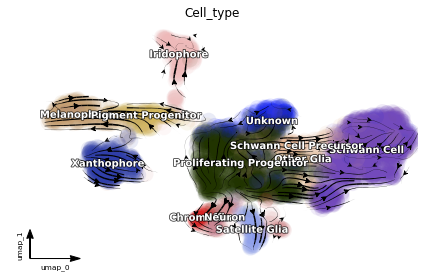

In [16]:
dyn.pl.streamline_plot(adata, color=['Cell_type'], basis='umap', show_legend='on data', show_arrowed_spines=True)


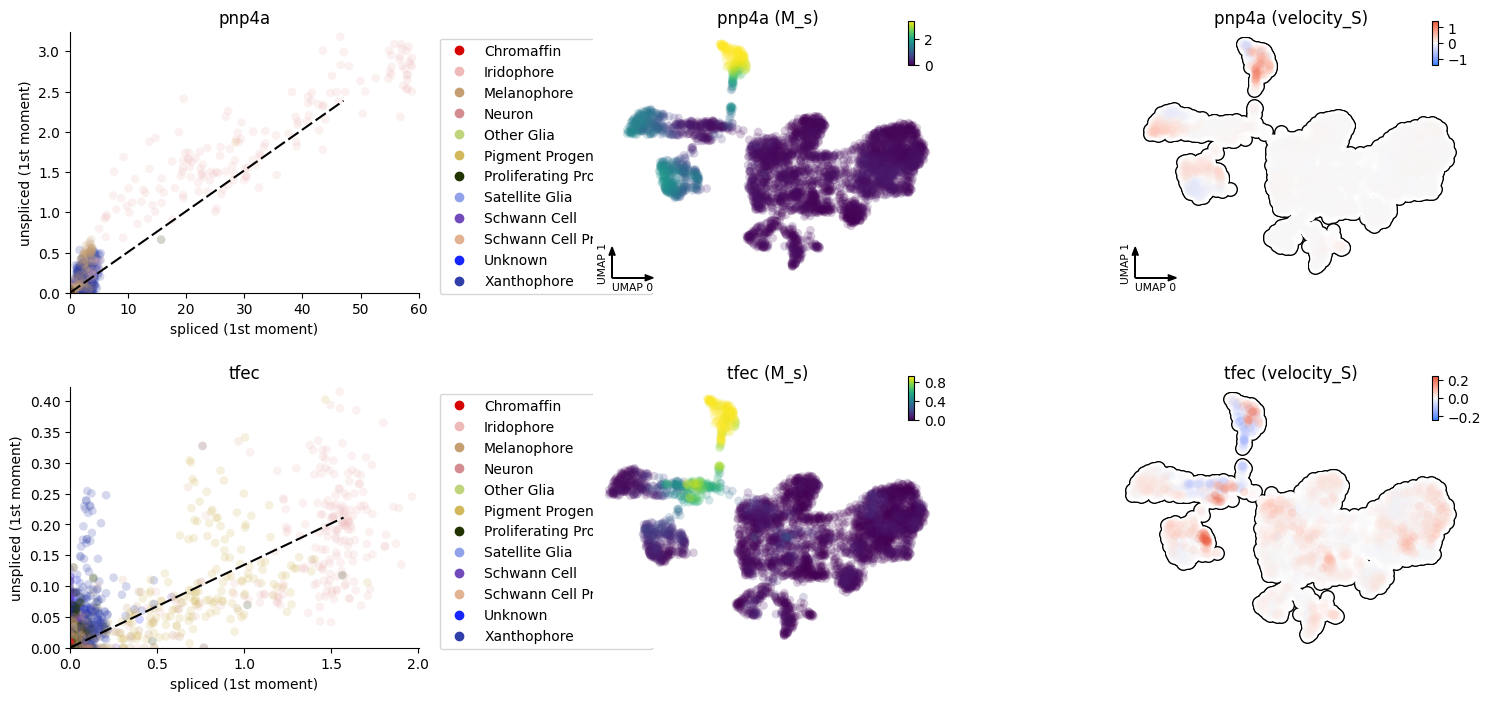

In [17]:
dyn.pl.phase_portraits(adata, genes=['tfec', 'pnp4a'],  figsize=(6, 4), color='Cell_type')